<a href="https://colab.research.google.com/github/eemayes2/IE517_F21_HW2/blob/main/IE517_HWK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IRIS dataset 

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class lables:', np.unique(y))

Class lables: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, 
                                                     random_state = 1, stratify = y)

In [ ]:
print('Labels couts in y:', np.bincount(y))
print('Labels counts in y_train: ', np.bincount(y_train))
print('Labels coutns in y_test: ', np.bincount(y_test))

Labels couts in y: [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels coutns in y_test:  [15 15 15]


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, test_idx = None, resolution = 0.02):

  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
  x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c = colors[idx], 
                marker = markers[idx], label = cl, edgecolor = 'black')
    
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:,0], X_test[:,1], c = '', edgecolor = 'black', alpha = 1.0,
                linewidth=1, marker = 'o', s = 100, label = 'test_set')

### Decision Tree

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


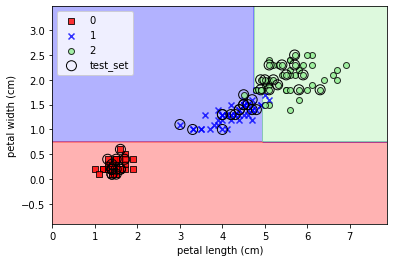

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier = tree, test_idx = range(105, 150))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled = True, rounded = True, 
                           class_names = ['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names = ['petal length', 'petal width'], out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

### KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_combined_std = sc.transform(X_combined)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


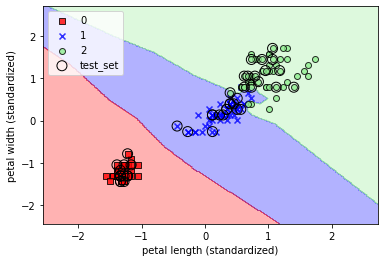

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


k_range = range(1,26)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k, p = 2, metric = 'minkowski')
  knn.fit(X_train_std, y_train)
  y_pred = knn.predict(X_test_std)
  scores.append(accuracy_score(y_test, y_pred))

k_max = scores.index(max(scores))

knn = KNeighborsClassifier(n_neighbors = k_max, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = knn, 
                      test_idx = range(105,150))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
scores

[0.9777777777777777,
 0.9777777777777777,
 1.0,
 0.9777777777777777,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

# Treasury Squeeze Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Treasury_Squeeze_raw_score_data.csv', header=0)

In [ ]:
df.head()

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False


In [ ]:
df = df.drop(columns = ['rowindex', 'contract'])
X = df.drop(columns = ['squeeze'])
y = df['squeeze']
X.head()

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio
0,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313
1,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000
2,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676
3,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000
4,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025


In [ ]:
y.head()

0     True
1    False
2    False
3     True
4    False
Name: squeeze, dtype: bool

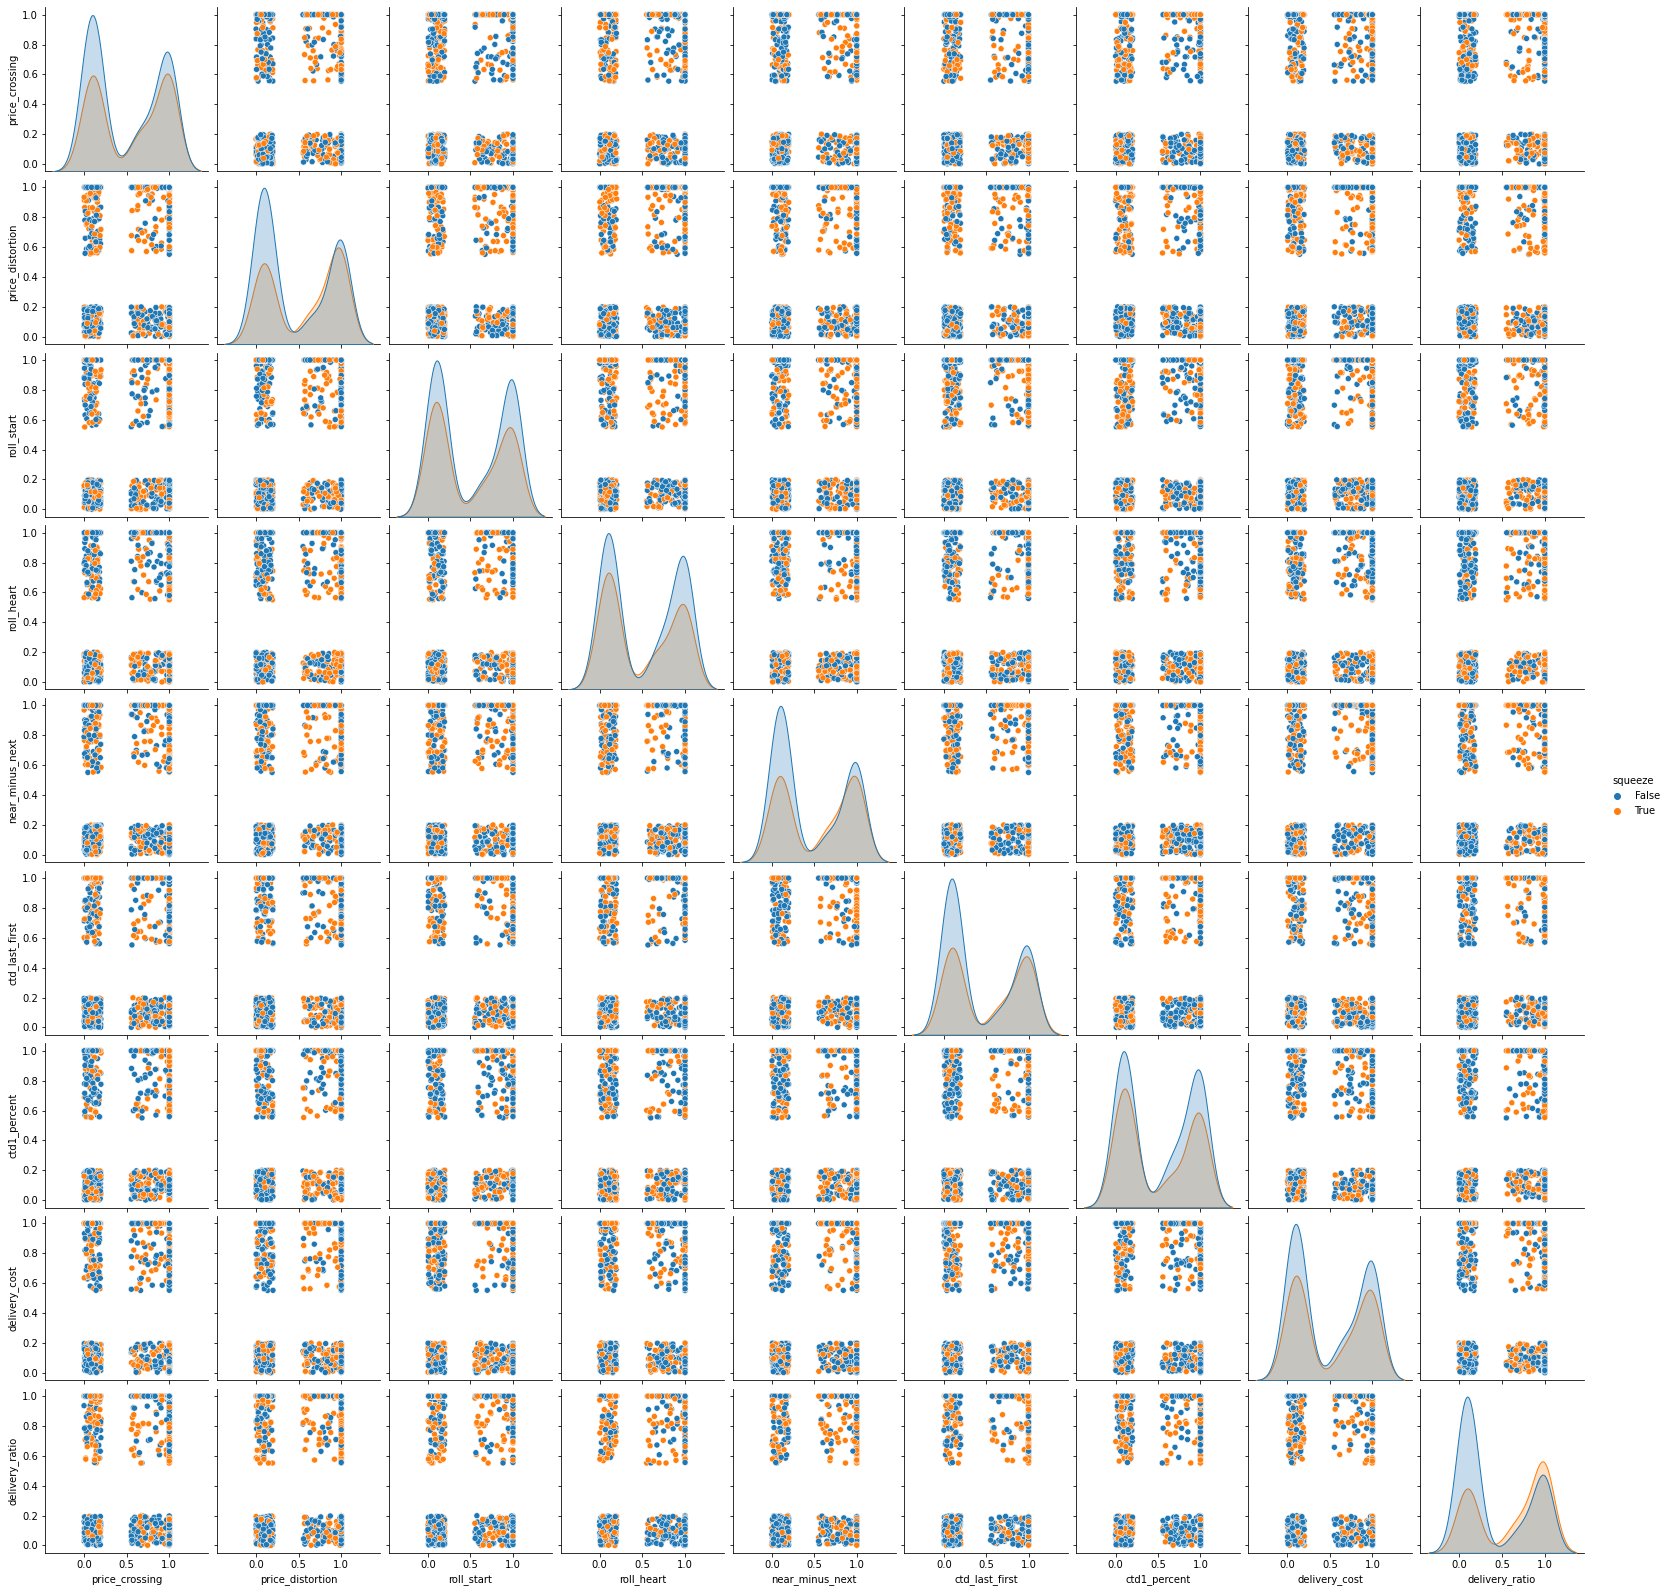

In [ ]:
# Seaborn visualization library
import seaborn as sns# Create the default pairplot
sns.pairplot(df, hue = 'squeeze')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, 
                                                     random_state = 1, stratify = y)

In [ ]:
X_combined

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3],
       [5.7, 2.1],
       [1.2, 0.2],
       [5.6, 2.4],
       [6.6, 2.1],
       [1.2, 0.2],
       [5.8, 1.6],
       [4.6, 1.3],
       [3.3, 1. ],
       [3.9, 1.4],
       [1.3, 0.2],
       [4.7, 1.2],
       [4. , 1.3],
       [5.1, 1.9],
       [1.9, 0.2],
       [3.5, 1. ],
       [3.9, 1.2],
       [1.6, 0.2],
       [4.8, 1.8],
       [6.9, 2.3],
       [4.5, 1.5],
       [4.5, 1.3],
       [3.8, 1.1],
       [5.6, 2.4],
       [4.7, 1.4],
       [5.6, 1.4],
       [5.8, 2.2],
       [5.1, 2.4],
       [4.1, 1.3],
       [1.5, 0.4],
       [6.7, 2.2],
       [5. , 1.9],
       [4.8, 1.8],
       [5.6, 2.1],
       [4.2, 1.5],
       [6.7, 2. ],
       [5.5, 1.8],
       [1.6, 0.2],
       [4.9, 1.8],
       [1.4, 0.2],
       [5.1, 1.5],
       [1.9, 0.4],
       [1. , 0.2],
       [4.9, 1.5],
       [1.5, 0.2],
       [1.1, 0.1],
       [5.5, 1.8],
       [4.7, 1.5],
       [1.7, 0.3],
       [3.5, 1. ],
       [4.1,

### Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5888888888888889


In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled = True, rounded = True, 
                           class_names = ['True', 'False'], 
                           feature_names = ['price_crossing', 'price_distortion', 
                                            'roll_start', 'roll_heart', 'near_minus_next',
                                            'ctd_last_first', 'ctd1_percent', 'delivery_cost',
                                            'delivery_ratio'], out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('TStree.png')

True

### KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_combined_std = sc.transform(X_combined)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


k_range = range(1,26)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k, p = 2, metric = 'minkowski')
  knn.fit(X_train_std, y_train)
  y_pred = knn.predict(X_test_std)
  scores.append(accuracy_score(y_test, y_pred))

k_max = scores.index(max(scores))

knn = KNeighborsClassifier(n_neighbors = k_max, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)

print(scores[k_max])

0.6407407407407407


In [ ]:
scores

[0.5888888888888889,
 0.5888888888888889,
 0.5777777777777777,
 0.5925925925925926,
 0.5666666666666667,
 0.6,
 0.5925925925925926,
 0.6,
 0.6,
 0.6037037037037037,
 0.6037037037037037,
 0.6148148148148148,
 0.6259259259259259,
 0.6407407407407407,
 0.6333333333333333,
 0.6296296296296297,
 0.6222222222222222,
 0.6370370370370371,
 0.6296296296296297,
 0.6333333333333333,
 0.6296296296296297,
 0.6296296296296297,
 0.6259259259259259,
 0.6296296296296297,
 0.6185185185185185]

## Final Statements

In [ ]:
print("My name is Emma Mayes")
print("My NetID is: eemayes2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Emma Mayes
My NetID is: eemayes2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [112]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('IE517_HWK2.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IE517_HWK2.ipynb to pdf
[NbConvertApp] Support files will be in IE517_HWK2_files/
[NbConvertApp] Making directory ./IE517_HWK2_files
[NbConvertApp] Making directory ./IE517_HWK2_files
[NbConvertApp] Making directory ./IE517_HWK2_files
[NbConvertApp] Writing 54823 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1275546 bytes to /content/drive/My Drive/IE517_HWK2.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'